In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [31]:
# Load dataset
data = pd.read_csv("25RP19905.csv")
data.head()


,Unnamed: 0,Temperature,Crop_Yield
0,0,27.483571,58.922301
1,1,24.308678,44.070420
2,2,28.238443,63.490857
3,3,32.615149,58.221043
4,4,23.829233,50.592752


Lowest and Highest Temperature Values

In [43]:
# Separate Features (X) and Target
X = data[['Temperature']]   # Feature
y = data['Crop_Yield']      # Target


In [44]:
min_temp = data['Temperature'].min()
max_temp = data['Temperature'].max()

print("Lowest Temperature:", min_temp)
print("Highest Temperature:", max_temp)


Lowest Temperature: 11.90127448
Highest Temperature: 37.31621056


Separate Features (X) and Target

In [45]:
X = data[['Temperature']]
y = data['Crop_Yield']

Split Data into Training (80%) and Testing

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train the Models

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

Random Forest Regressor

In [48]:
rf_model = RandomForestRegressor(
    n_estimators=100, random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Model Evaluation & Best Model Selection

In [49]:
# Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluation Metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression MSE:", lr_mse)
print("Linear Regression R2 Score:", lr_r2)

print("Random Forest MSE:", rf_mse)
print("Random Forest R2 Score:", rf_r2)


Linear Regression MSE: 37.75854544001958
Linear Regression R2 Score: 0.7167858894077912
Random Forest MSE: 41.64544532724082
Random Forest R2 Score: 0.6876315646928997


Model Evaluation & Best Model Selection

In [50]:
# Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluation Metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression MSE:", lr_mse)
print("Linear Regression R2 Score:", lr_r2)

print("Random Forest MSE:", rf_mse)
print("Random Forest R2 Score:", rf_r2)


Linear Regression MSE: 37.75854544001958
Linear Regression R2 Score: 0.7167858894077912
Random Forest MSE: 41.64544532724082
Random Forest R2 Score: 0.6876315646928997


Save the Best Model

In [57]:
joblib.dump(best_model, "crop_yield_model_25RP19905.pkl")
print("Model saved successfully!")

Model saved successfully!


Visualization

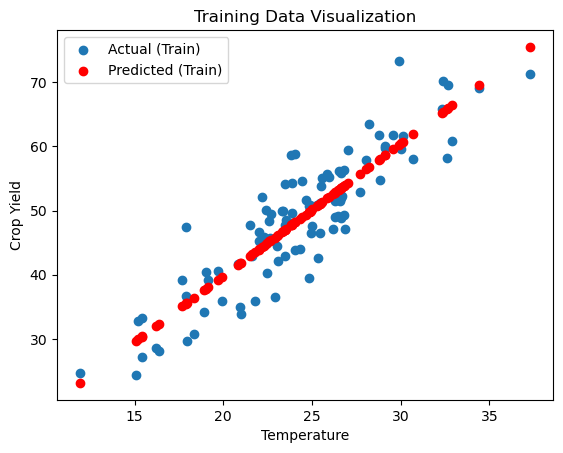

In [58]:
plt.scatter(X_train, y_train, label="Actual (Train)")
plt.scatter(X_train, best_model.predict(X_train),
            color='red', label="Predicted (Train)")
plt.xlabel("Temperature")
plt.ylabel("Crop Yield")
plt.title("Training Data Visualization")
plt.legend()
plt.show()


Testing Data

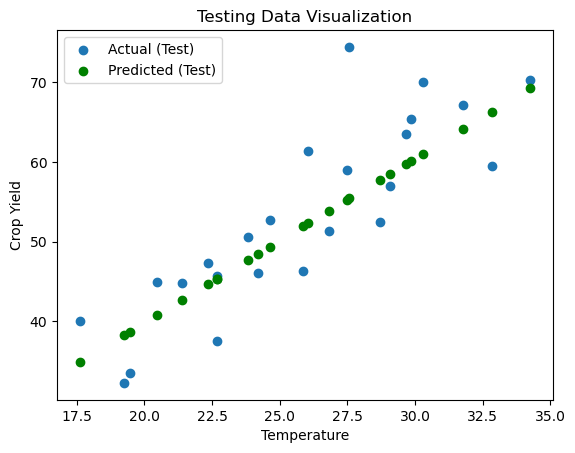

In [59]:
plt.scatter(X_test, y_test, label="Actual (Test)")
plt.scatter(X_test, best_model.predict(X_test),
            color='green', label="Predicted (Test)")
plt.xlabel("Temperature")
plt.ylabel("Crop Yield")
plt.title("Testing Data Visualization")
plt.legend()
plt.show()


In [60]:
import os
import joblib

# Folder name
folder_name = "25RP19905"

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the model inside the folder
joblib.dump(best_model, os.path.join(folder_name, "crop_yield_model_25RP19905.pkl"))
print(f"Model saved successfully in folder '{folder_name}'!")


Model saved successfully in folder '25RP19905'!
